<a href="https://colab.research.google.com/github/AjeetSingh02/Notebooks/blob/master/image_to_table.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%%capture
!pip install pandas_profiling==2.1.2

In [0]:
import pandas as pd
import time
import pandas_profiling

df = pd.read_csv("/content/sample_data/california_housing_train.csv")

start = time.time()

profile = pandas_profiling.ProfileReport(df)
parent_dict = profile.get_description()

end = time.time()
print(end - start)

print(parent_dict.keys())
print(len(parent_dict["table"].keys()))
print(parent_dict["correlations"].keys())
print(len(parent_dict["variables"]["households"]))

19.059215784072876
dict_keys(['table', 'variables', 'correlations', 'missing', 'messages'])
21
dict_keys(['pearson', 'spearman', 'kendall', 'phi_k'])
43


In [0]:
!pip install opencv-python==4.1.1.26

     |████████████████████████████████| 28.7MB 81kB/s 
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: opencv-python 3.4.7.28
    Uninstalling opencv-python-3.4.7.28:
      Successfully uninstalled opencv-python-3.4.7.28


In [0]:
out_path = "/content/out/"
file = "/content/half.png"

In [0]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

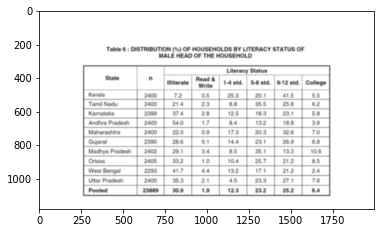

In [0]:
# Reading the image
img = cv2.imread(file, 0)
plt.imshow(img, cmap = 'gray', interpolation = 'bicubic')

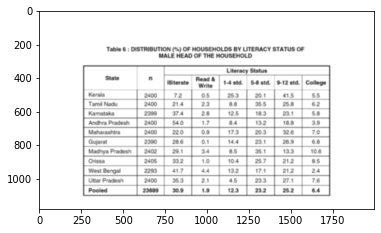

In [0]:
 # Thresholding the image
(thresh, img_bin) = cv2.threshold(img, 128, 255, cv2.THRESH_BINARY| cv2.THRESH_OTSU)
plt.imshow(img_bin, cmap = 'gray', interpolation = 'bicubic')

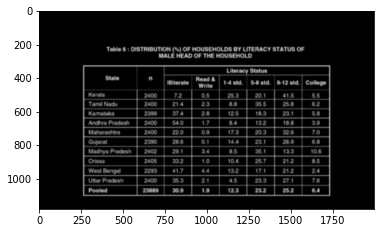

In [0]:
# Inverting the image
img_bin = 255-img_bin 
cv2.imwrite(f"out/Image_bin.jpg", img_bin)

plt.imshow(img_bin, cmap = 'gray', interpolation = 'bicubic')

In [0]:
# Defining a kernel length
kernel_length = np.array(img).shape[1]//80
 
# A verticle kernel of (1 X kernel_length), which will detect all the verticle lines from the image.
verticle_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1, kernel_length))

# A horizontal kernel of (kernel_length X 1), which will help to detect all the horizontal line from the image.
hori_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (kernel_length, 1))

# A kernel of (3 X 3) ones.
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))

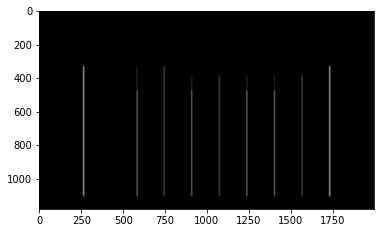

In [0]:
# Morphological operation to detect vertical lines from an image
img_temp1 = cv2.erode(img_bin, verticle_kernel, iterations=3)
verticle_lines_img = cv2.dilate(img_temp1, verticle_kernel, iterations=3)
cv2.imwrite(f"{out_path}{file[:-4]}_verticle_lines.jpg",verticle_lines_img)

plt.imshow(verticle_lines_img, cmap = 'gray', interpolation = 'bicubic')

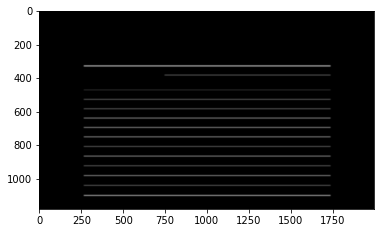

In [0]:
# Morphological operation to detect horizontal lines from an image
img_temp2 = cv2.erode(img_bin, hori_kernel, iterations=3)
horizontal_lines_img = cv2.dilate(img_temp2, hori_kernel, iterations=3)
cv2.imwrite(f"{out_path}{file[:-4]}_horizontal_lines.jpg",horizontal_lines_img)

plt.imshow(horizontal_lines_img, cmap = 'gray', interpolation = 'bicubic')

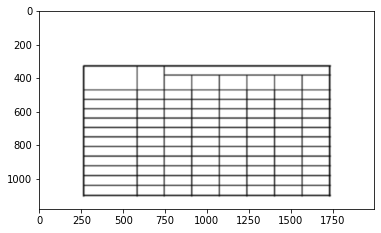

In [0]:
# Weighting parameters, this will decide the quantity of an image to be added to make a new image.
alpha = 0.5
beta = 1.0 - alpha

# This function helps to add two image with specific weight parameter to get a third image as summation of two image.
img_final_bin = cv2.addWeighted(verticle_lines_img, alpha, horizontal_lines_img, beta, 0.0)

img_final_bin_er = cv2.erode(~img_final_bin, kernel, iterations=2)

(thresh, img_final_bin_thres) = cv2.threshold(img_final_bin_er, 128,255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)

cv2.imwrite(f"{out_path}{file[:-4]}_img_final_bin.jpg",img_final_bin_thres)

plt.imshow(img_final_bin_thres, cmap = 'gray', interpolation = 'bicubic')

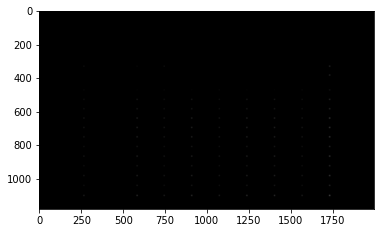

In [0]:
#intersections
img2_fg = cv2.bitwise_and(verticle_lines_img, horizontal_lines_img)
cv2.imwrite("_img_and.jpg",img2_fg)

plt.imshow(img2_fg, cmap = 'gray', interpolation = 'bicubic')

In [0]:
img2_fg.shape

(1181, 1999)

In [0]:
np.where(img2_fg>0)

(array([ 328,  328,  328,  328,  328,  328,  328,  328,  328,  328,  329,
         329,  329,  329,  329,  329,  329,  329,  329,  329,  381,  381,
         381,  381,  381,  382,  382,  382,  382,  382,  470,  470,  470,
         470,  470,  470,  470,  470,  470,  470,  470,  470,  470,  470,
         470,  470,  470,  526,  526,  526,  526,  526,  526,  526,  526,
         526,  526,  526,  526,  526,  526,  526,  526,  526,  526,  526,
         526,  526,  526,  526,  526,  526,  527,  527,  527,  527,  527,
         527,  527,  527,  527,  527,  527,  527,  527,  527,  527,  527,
         527,  527,  527,  527,  527,  527,  527,  527,  527,  582,  582,
         582,  582,  582,  582,  582,  582,  582,  582,  582,  582,  582,
         582,  582,  582,  582,  582,  582,  582,  582,  582,  582,  582,
         582,  583,  583,  583,  583,  583,  583,  583,  583,  583,  583,
         583,  583,  583,  583,  583,  583,  583,  583,  583,  583,  583,
         583,  583,  583,  583,  637, 

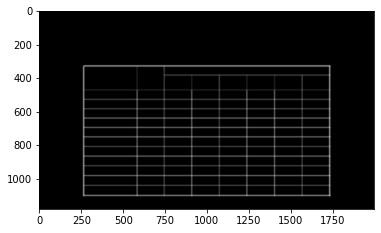

In [0]:
img2_fg1 = cv2.bitwise_or(verticle_lines_img, horizontal_lines_img)
cv2.imwrite("img_or.jpg",img2_fg1)

plt.imshow(img2_fg1, cmap = 'gray', interpolation = 'bicubic')

In [0]:
# joints = np.multiply(verticle_lines_img, horizontal_lines_img)

In [0]:
# plt.imshow(joints, cmap = 'gray', interpolation = 'bicubic')

In [0]:
img2_fg1.shape

(1181, 1999)

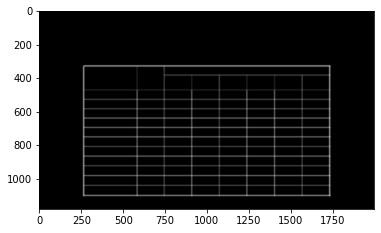

In [0]:
plt.imshow(img2_fg1, cmap = 'gray', interpolation = 'bicubic')

In [0]:
contours, hierarchy = cv2.findContours(img2_fg1, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

In [0]:
len(contours)

92

In [0]:
# sort in reverse based on contour area and use first 10 contours
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10]

In [0]:
cont = []
for c in contours:
    c_poly = cv2.approxPolyDP(c, 3, True)
    x, y, w, h = cv2.boundingRect(c_poly)
    cont.append((x, y, w, h))

In [0]:
cont

[(264, 325, 1476, 780),
 (747, 329, 986, 142),
 (268, 329, 318, 142),
 (585, 329, 162, 142),
 (268, 1040, 317, 59),
 (268, 982, 317, 58),
 (268, 923, 317, 58),
 (268, 470, 317, 57),
 (268, 866, 317, 57),
 (268, 808, 317, 57)]

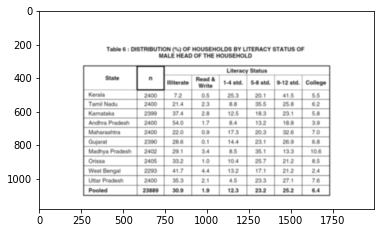

In [0]:
img = cv2.imread(file, 0)
cv2.drawContours(img, contours, 3, (0, 255, 0), 6)

plt.imshow(img, cmap = 'gray', interpolation = 'bicubic')

1. Take the biggest contour
2. Find all the joints in it
3. Make boxes from those joints
4. sort those boxes
5. put all the boxes which are in same line in a list
6. put all the lists in a list

In [0]:
c = cont[0]
x, y, w, h = c
roi_t = img[y : y + h, x : x + w]

In [0]:
jc, __ = cv2.findContours(roi_t.astype(np.uint8), cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)

In [0]:
len(jc)

1445

In [0]:
for j in jc:
    jx, jy, jw, jh = cv2.boundingRect(j)

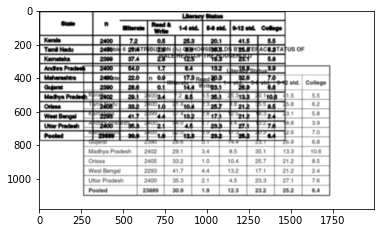

In [0]:
img = cv2.imread(file, 0)
cv2.drawContours(img, jc, -1, (0, 255, 0), 3)

plt.imshow(img, cmap = 'gray', interpolation = 'bicubic')

In [0]:
c = cont[0]
x, y, w, h = c
roi = joints[y : y + h, x : x + w]

In [0]:
print(c)

(264, 325, 1476, 780)


In [0]:
jc, __ = cv2.findContours(roi.astype(np.uint8), cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)

In [0]:
len(jc)

113

In [0]:
for j in jc:
    jx, jy, jw, jh = cv2.boundingRect(j)
    c1, c2 = x + (2 * jx + jw) // 2, y + (2 * jy + jh) // 2
    joint_coords.append((c1, c2))
tables[(x, y + h, x + w, y)] = joint_coords

In [0]:
for j in jc:
    jx, jy, jw, jh = cv2.boundingRect(j)
    # print(jx,jy,jw,jh)
    c1, c2 = x + (2 * jx + jw) // 2, y + (2 * jy + jh) // 2
    print(c1, c2)

In [0]:
# !pip install img2pdf

# from PIL import Image
# import img2pdf

# im = Image.open("/content/half.png")

# # if im.mode == "RGBA":
# #     im = im.convert("RGB")
# # byte = img2pdf.convert(im)
# # with open("pdfname.pdf", "wb") as file:
# #     file.write(byte)


# with open("pdfname.pdf", "wb") as file:
#     file.write(img2pdf.convert("/content/half.jpg"))

# !pip install tabula-py
# import tabula



# # Read pdf into DataFrame
# df = tabula.read_pdf("/content/pdfname.pdf", pages='all')